Original Data:
      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

First Five Data
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male

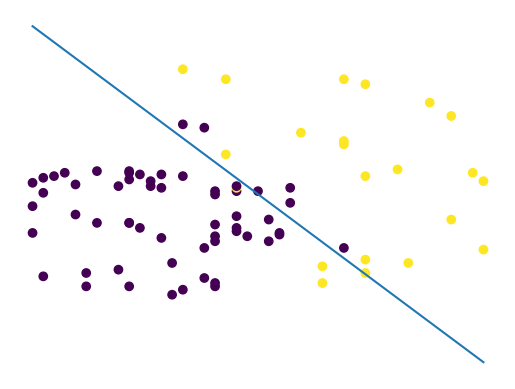

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv("Social_Network_Ads.csv")
print("Original Data:")
print(data)
print()
print("First Five Data")
print(data.head())
print()
print("Data size:")
print(data.shape)
print()

#Saving Data in X and Y 
x = data.iloc[:,[2,3]]
y = data.iloc[:,4]
print("X Data:")
print(x.head())
print()
print("Y Data:")
print(y.head())

print()

#Splitting Data in Train and Test
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)
print("X train data:")
print(X_train)
print()
print("Y train data:")
print(Y_train)

'''print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)'''

#Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Train the classifiers
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the test set results
Y_pred = classifier.predict(X_test)
print("Y predicted Data:")
print(Y_pred)

print()

print("Accuracy score:With linear kernel")
print(metrics.accuracy_score(Y_test,Y_pred))

print()

#Plotting test set results
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)

#Create a hyperplane and calculation of hyperplane equation
w = classifier.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(X_test[:,0].min(),X_test[:,0].max())
yy = a * xx - (classifier.intercept_[0]/w[1])

#Plot hyperplane
plt.plot(xx,yy)
plt.axis("off")
plt.show()